In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_del_archivo = 'data/Dataset_final_ventas.csv'

# Lee el archivo xlsx y carga los datos en un DataFrame
#instalar = pip install openpyxl
df = pd.read_csv(ruta_del_archivo , sep=";")

In [3]:
df.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,Municipios,RMP,RMH
0,Piso,Valdemoro,215000.0,122.0,3,2,1762.30,Valdemoro,0,237311.82,1964.44,Valdemoro,13327.0,39791.0
1,Piso,Galapagar,140000.0,66.0,2,1,2121.21,Galapagar,0,267791.35,2090.99,Galapagar,14996.0,43503.0
2,Casa,Villalbilla,279000.0,180.0,4,3,1550.00,Villalbilla,0,317801.71,1887.06,Villalbilla,16160.0,47715.0
3,Piso,Alcorcón,196800.0,85.0,4,1,2315.29,Alcorcón,0,205540.00,2313.14,Alcorcón,13993.0,36837.0
4,Piso,Griñón,130000.0,86.0,3,1,1511.63,Griñón,0,329061.54,1519.84,Griñón,14500.0,44410.0


In [4]:
df.dtypes

Tipo_vivienda     object
Población         object
Precio           float64
Superficie       float64
Habitaciones       int64
Baños              int64
Precio/m²        float64
Zonas             object
Zona_binaria       int64
PMZona           float64
PMm²Zona         float64
Municipios        object
RMP              float64
RMH              float64
dtype: object

### Probando con Tipos de viviendas

In [5]:
arbol = pd.read_csv(ruta_del_archivo , sep=";")
arbol.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,Municipios,RMP,RMH
0,Piso,Valdemoro,215000.0,122.0,3,2,1762.30,Valdemoro,0,237311.82,1964.44,Valdemoro,13327.0,39791.0
1,Piso,Galapagar,140000.0,66.0,2,1,2121.21,Galapagar,0,267791.35,2090.99,Galapagar,14996.0,43503.0
2,Casa,Villalbilla,279000.0,180.0,4,3,1550.00,Villalbilla,0,317801.71,1887.06,Villalbilla,16160.0,47715.0
3,Piso,Alcorcón,196800.0,85.0,4,1,2315.29,Alcorcón,0,205540.00,2313.14,Alcorcón,13993.0,36837.0
4,Piso,Griñón,130000.0,86.0,3,1,1511.63,Griñón,0,329061.54,1519.84,Griñón,14500.0,44410.0


In [6]:
arbol["Tipo_vivienda"].unique()

array(['Piso', 'Casa', 'Chalet'], dtype=object)

In [7]:
#Tenemos que transformar el tipo de vivienda a numerico
# Import label encoder 
from sklearn import preprocessing
#label_encoder sabe cómo entender las etiquetas de las palabras.
label_encoder = preprocessing.LabelEncoder()
#Codificar etiquetas en columna
arbol["Tipo_vivienda"]= label_encoder.fit_transform(arbol["Tipo_vivienda"])

In [8]:
arbol["Tipo_vivienda"].unique()
#2 piso
#0 casa
#1 chalet

array([2, 0, 1])

In [9]:
#Ahora escogemos las columnas que vamos a utilizar
arbol.head(5)

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,Municipios,RMP,RMH
0,2,Valdemoro,215000.0,122.0,3,2,1762.30,Valdemoro,0,237311.82,1964.44,Valdemoro,13327.0,39791.0
1,2,Galapagar,140000.0,66.0,2,1,2121.21,Galapagar,0,267791.35,2090.99,Galapagar,14996.0,43503.0
2,0,Villalbilla,279000.0,180.0,4,3,1550.00,Villalbilla,0,317801.71,1887.06,Villalbilla,16160.0,47715.0
3,2,Alcorcón,196800.0,85.0,4,1,2315.29,Alcorcón,0,205540.00,2313.14,Alcorcón,13993.0,36837.0
4,2,Griñón,130000.0,86.0,3,1,1511.63,Griñón,0,329061.54,1519.84,Griñón,14500.0,44410.0


In [10]:
prueba_arbol = arbol[["Tipo_vivienda", "Superficie", "Precio", "Habitaciones" ,"Baños"]]
prueba_arbol.head()

,Tipo_vivienda,Superficie,Precio,Habitaciones,Baños
0,2,122.0,215000.0,3,2
1,2,66.0,140000.0,2,1
2,0,180.0,279000.0,4,3
3,2,85.0,196800.0,4,1
4,2,86.0,130000.0,3,1


In [11]:
feature_cols = ["Superficie", "Precio", "Habitaciones" ,"Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Tipo_vivienda']

In [12]:
print(X)

      Superficie    Precio  Habitaciones  Baños
0          122.0  215000.0             3      2
1           66.0  140000.0             2      1
2          180.0  279000.0             4      3
3           85.0  196800.0             4      1
4           86.0  130000.0             3      1
...          ...       ...           ...    ...
3061        60.0   89000.0             3      1
3062        75.0  175000.0             3      1
3063        60.0  230000.0             2      2
3064       207.0  409000.0             5      3
3065        78.0  128000.0             3      1

[3066 rows x 4 columns]


In [13]:
print(y)

0       2
1       2
2       0
3       2
4       2
       ..
3061    2
3062    2
3063    2
3064    1
3065    2
Name: Tipo_vivienda, Length: 3066, dtype: int32


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
# crear arbol de decision
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifier object using entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf_entropy = clf_entropy.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8315217391304348


### Árbol de desicion (Con tipo de vivienda)

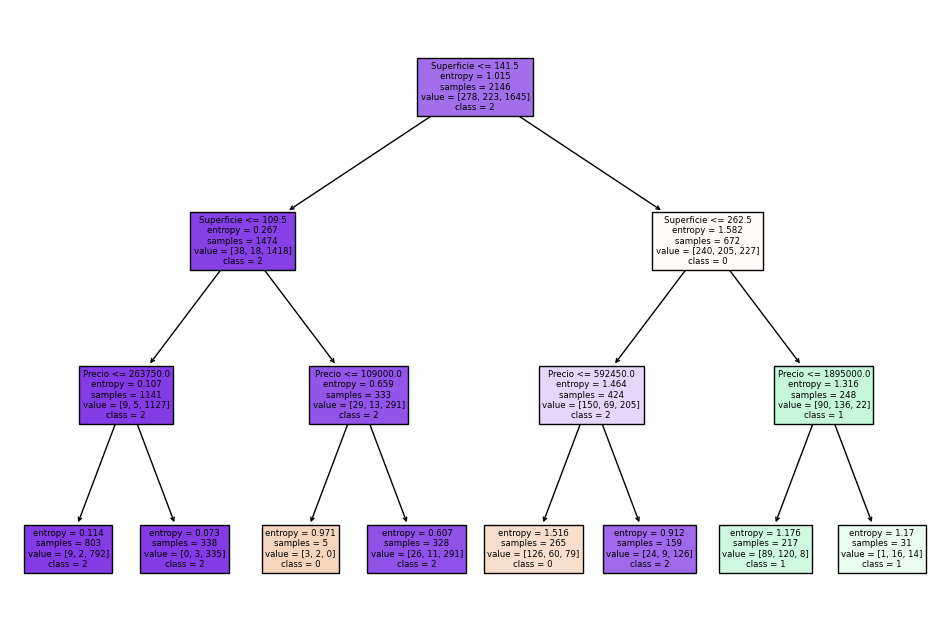

Accuracy: 0.8315217391304348


In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Convertir las etiquetas de clase a cadenas si es necesario
class_names_str = [str(class_) for class_ in clf_entropy.classes_]

# Visualizar el árbol de decisión directamente en la salida del código
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=feature_cols, class_names=class_names_str)
plt.show()

# Evaluar la precisión del modelo
y_pred = clf_entropy.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### Regresion lineal polinomica (Con precio)

In [17]:
rlp = pd.read_csv(ruta_del_archivo , sep=";")
rlp.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,Municipios,RMP,RMH
0,Piso,Valdemoro,215000.0,122.0,3,2,1762.30,Valdemoro,0,237311.82,1964.44,Valdemoro,13327.0,39791.0
1,Piso,Galapagar,140000.0,66.0,2,1,2121.21,Galapagar,0,267791.35,2090.99,Galapagar,14996.0,43503.0
2,Casa,Villalbilla,279000.0,180.0,4,3,1550.00,Villalbilla,0,317801.71,1887.06,Villalbilla,16160.0,47715.0
3,Piso,Alcorcón,196800.0,85.0,4,1,2315.29,Alcorcón,0,205540.00,2313.14,Alcorcón,13993.0,36837.0
4,Piso,Griñón,130000.0,86.0,3,1,1511.63,Griñón,0,329061.54,1519.84,Griñón,14500.0,44410.0


In [18]:
feature_cols = ["Superficie", "Habitaciones" ,"Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

In [19]:
print(X)
print("*"*32)
print(y)

      Superficie  Habitaciones  Baños
0          122.0             3      2
1           66.0             2      1
2          180.0             4      3
3           85.0             4      1
4           86.0             3      1
...          ...           ...    ...
3061        60.0             3      1
3062        75.0             3      1
3063        60.0             2      2
3064       207.0             5      3
3065        78.0             3      1

[3066 rows x 3 columns]
********************************
0       215000.0
1       140000.0
2       279000.0
3       196800.0
4       130000.0
          ...   
3061     89000.0
3062    175000.0
3063    230000.0
3064    409000.0
3065    128000.0
Name: Precio, Length: 3066, dtype: float64


MSE Train: 118255867620.63268
MSE Test: 275068619262.20953
R2 Train: 0.4629826567223352
R2 Test: 0.032687546225305564


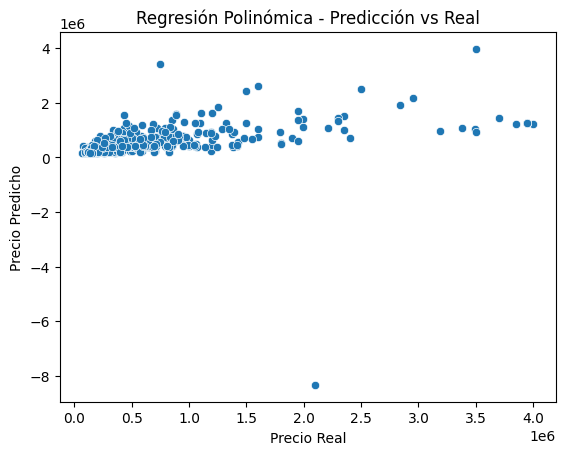

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definir las columnas de características y la variable objetivo
feature_cols = ["Superficie", "Habitaciones", "Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grado del polinomio
degree = 2

# Crear características polinómicas
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear y entrenar el modelo de regresión lineal polinómica
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predecir en los conjuntos de prueba y entrenamiento
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

# Crear un DataFrame para visualizar los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicción': y_test_pred
})

# Visualizar la regresión polinómica utilizando Seaborn
sns.scatterplot(data=df_results, x='Actual', y='Predicción')
plt.title('Regresión Polinómica - Predicción vs Real')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()


### Regresion de bosque (Random Forest Regression) con Precio

MSE Train: 32840949657.91573
MSE Test: 139939068101.2938
R2 Train: 0.8508644019881819
R2 Test: 0.5078871457344616


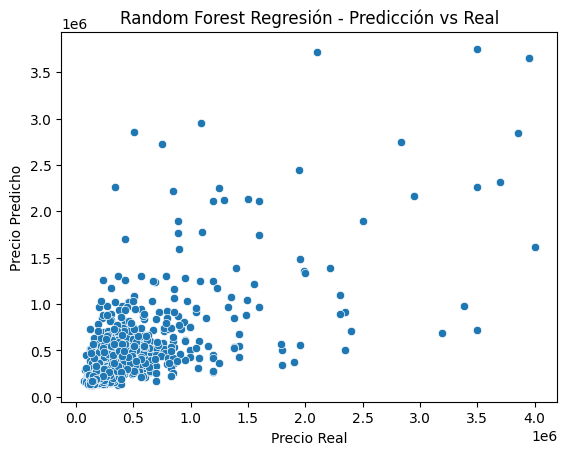

'random_forest_tree.pdf'

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split### Regresion de Bosque (Random Forest Regression)

arbol = pd.read_csv(ruta_del_archivo , sep=";")
arbol.head()
prueba_rforest = arbol[["Superficie", "Habitaciones", "Baños", "Precio"]]
# Definir las columnas de características y la variable objetivo
feature_cols =  ["Superficie", "Habitaciones", "Baños"]
X = prueba_rforest[feature_cols]
y = prueba_rforest['Precio']
X
y
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 30% de test 

# Crear y entrenar el modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
# Predecir en los conjuntos de prueba y entrenamiento
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')
# Crear un DataFrame para visualizar los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicción': y_test_pred
})
# Visualizar la regresión Random Forest utilizando Seaborn
sns.scatterplot(data=df_results, x='Actual', y='Predicción')
plt.title('Random Forest Regresión - Predicción vs Real')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor
# Crear y entrenar el modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(X, y)

# Seleccionar un árbol individual del Random Forest (por ejemplo, el primer árbol)
tree_index = 0
tree = rf_model.estimators_[tree_index]

# Exportar el árbol a formato DOT
dot_data = export_graphviz(tree, out_file=None, feature_names=feature_cols, filled=True, rounded=True, special_characters=True)

# Visualizar el árbol con Graphviz
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Esto guardará el árbol como un archivo PDF llamado "random_forest_tree.pdf"
graph.view("random_forest_tree")    # Esto abrirá el archivo PDF con el visor de PDF predeterminado

### Regresion Lineal (Con precio)

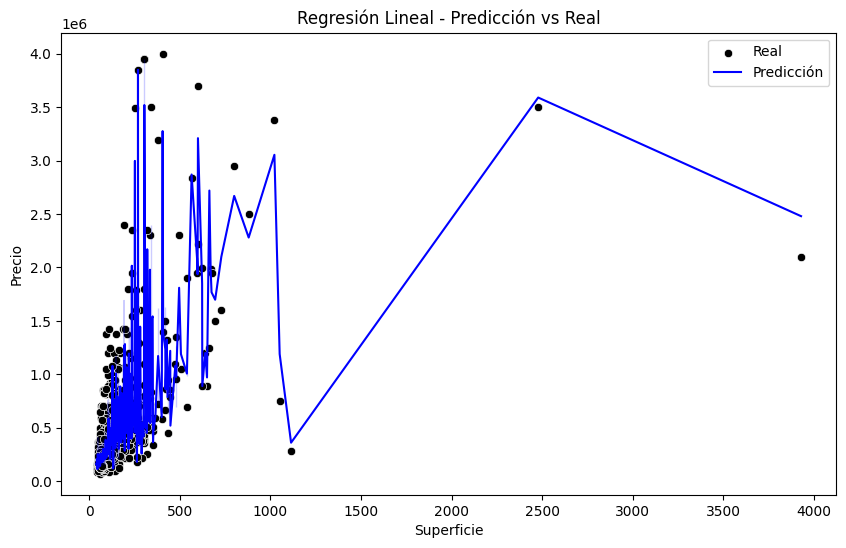

MSE Train: 38905770359.01248
MSE Test: 36509018621.38298
R2 Train: 0.8233231563325616
R2 Test: 0.8716115692066956


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir las columnas de características y la variable objetivo
feature_cols = ["Superficie", "Habitaciones", "Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Visualizar la regresión lineal utilizando Seaborn
plt.figure(figsize=(10, 6))

# Scatter plot de datos reales
sns.scatterplot(x=X_test['Superficie'], y=y_test, color='black', label='Real')

# Línea de regresión
sns.lineplot(x=X_test['Superficie'], y=y_test_pred, color='blue', label='Predicción')

plt.title('Regresión Lineal - Predicción vs Real')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')